<a href="https://colab.research.google.com/github/Firizki17/Machine-Learning/blob/main/ProjekAkhir_Firizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 Tugas Akhir Machine Learning – Clustering Kesehatan Mental Global

**Nama**: Muh Firizki  

**NPM**: 2226270024

**GitHub**: [github.com/firizki17](https://github.com/firizki17)

---

## 📌 Judul
**Segmentasi Negara Berdasarkan Prevalensi Gangguan Mental Menggunakan Algoritma K-Means Clustering**

---

## 📚 Latar Belakang
Kesehatan mental menjadi isu global yang semakin penting. Prevalensi gangguan seperti depresi, kecemasan, bipolar, dan skizofrenia bervariasi antar negara. Untuk memahami pola tersebut, diperlukan metode analisis yang mampu menemukan struktur tersembunyi pada data tanpa label. Clustering adalah solusi yang tepat.

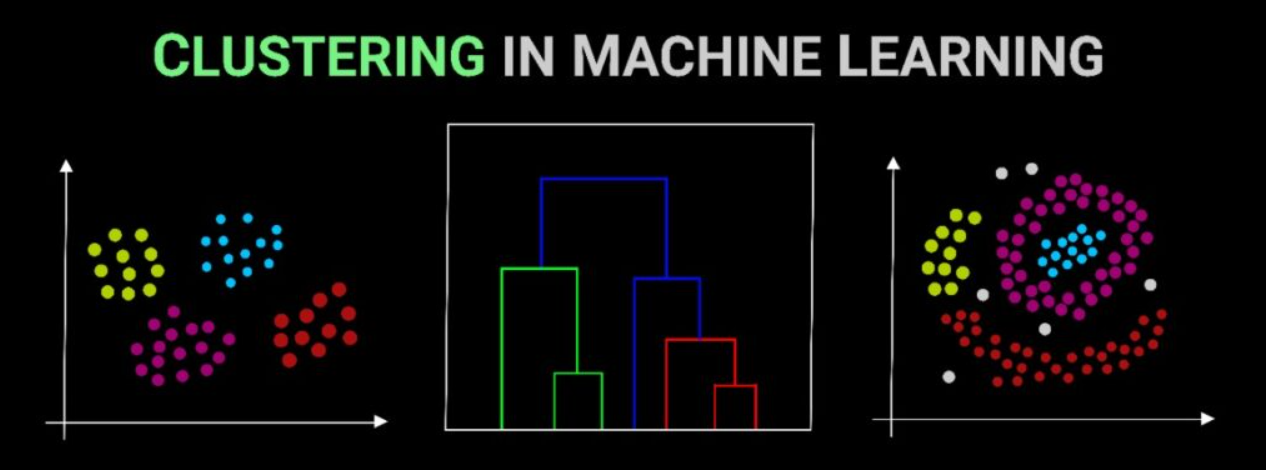

Apa Itu Clustering?
Clustering adalah metode dalam unsupervised learning yang bertujuan untuk mengelompokkan data ke dalam beberapa kelompok (cluster) berdasarkan kemiripan antar data.

Contoh: Jika kamu punya data penduduk berdasarkan pendapatan dan pengeluaran, clustering bisa bantu bagi ke dalam kelompok "miskin", "menengah", "kaya" — tanpa perlu label sebelumnya.

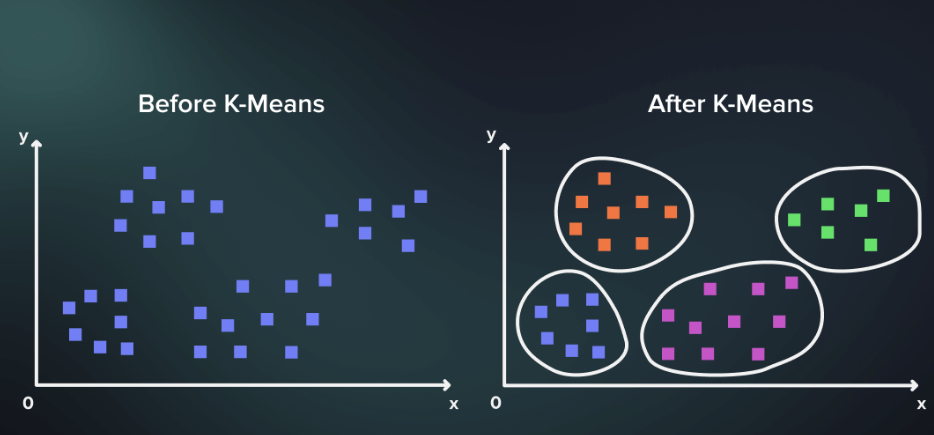

Alasan Pemilihan Metode Clustering (K-Means) dalam Proyek Ini
1. Karakteristik Data yang Tidak Berlabel
Dataset yang digunakan berisi prevalensi berbagai jenis gangguan mental di berbagai negara, namun tidak memiliki label atau kategori yang jelas. Artinya, kita tidak tahu dari awal kelompok negara mana yang tergolong "rawan", "sedang", atau "aman".

Oleh karena itu, metode unsupervised learning seperti clustering sangat cocok untuk:

* Mendeteksi pola tersembunyi

* Mengelompokkan negara berdasarkan kemiripan tingkat gangguan mental

2. Clustering Membantu dalam Segmentasi
Dengan clustering, kita dapat:

* Mengelompokkan negara-negara ke dalam beberapa segmen berdasarkan kemiripan prevalensi gangguan mental.

* Memberikan wawasan strategis bagi pengambil kebijakan untuk menetapkan prioritas intervensi di kelompok tertentu (misalnya: cluster negara dengan tingkat depresi tinggi).

3. Pemilihan Algoritma K-Means
Metode K-Means dipilih karena:

* Efisien dalam mengelompokkan data numerik berdimensi banyak.

* Sederhana dan mudah diimplementasikan.

Cocok untuk dataset berskala sedang dan fitur-fitur numerik seperti:

* Prevalensi Schizophrenia

* Depresi

* Gangguan Makan, dll.



# **1. Import Library dan Load Dataset**

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
dataset = pd.read_csv('mental-illnesses-prevalence.csv')


**Penjelasan:**

Mengimpor library yang diperlukan dan membaca dataset mental-illnesses-prevalence.csv yang berisi data prevalensi gangguan mental di berbagai negara.
1. numpy: untuk perhitungan numerik.

2. matplotlib.pyplot & seaborn: untuk visualisasi grafik dan plot.

3. pandas: untuk membaca dan mengelola data dalam bentuk tabel (DataFrame).

4. sklearn.cluster.KMeans: algoritma K-Means untuk clustering.

5. silhouette_score: metrik evaluasi untuk menilai kualitas clustering.

Dataset mental-illnesses-prevalence.csv dimuat, berisi persentase prevalensi gangguan mental per negara untuk beberapa jenis gangguan:
1.   Schizophrenia disorders (share of population)	Persentase populasi yang mengalami skizofrenia
2. Bipolar disorders (share of population)	Persentase populasi yang mengalami gangguan bipolar
3. Eating disorders (share of population)	Persentase populasi dengan gangguan makan
4. Anxiety disorders (share of population)	Persentase populasi dengan gangguan kecemasan
5. Depressive disorders (share of population)	Persentase populasi dengan gangguan depresi




# **2. Eksplorasi Awal Dataset**

In [98]:
dataset.head(30)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


Penjelasan:
Menampilkan 30 baris pertama dari dataset agar kita bisa mengenal struktur datanya.

Ini penting untuk melihat:

1. Nama kolom

2. Tipe data

3. Adakah data kosong/null?

4. Apa data yang bisa dipakai untuk clustering?



In [99]:
dataset.shape

(6420, 8)

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

In [101]:
dataset.isnull().sum()

,0
Entity,0
Code,270
Year,0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,0


**Penjelasan:**

Penjelasan:
dataset.shape: Menampilkan jumlah baris dan kolom.

dataset.info(): Informasi struktur dataset termasuk tipe data setiap kolom.

dataset.isnull().sum(): Mengecek apakah ada data kosong (null) di tiap kolom.

📌 Tujuan: Untuk mengetahui apakah dataset bisa langsung dipakai atau perlu pembersihan (cleaning) dulu.



  # **3. Exploratory Data Analysis (EDA) dan Understanding**

In [102]:
dataset.columns

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

In [103]:
dataset.describe()

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [104]:
dataset.describe(include='O')

,Entity,Code
count,6420,6150
unique,214,205
top,Afghanistan,AFG
freq,30,30


In [105]:
dataset.Entity.unique()

array(['Afghanistan', 'Africa (IHME GBD)', 'Albania', 'Algeria',
       'America (IHME GBD)', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia (IHME GBD)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe (IHME GBD)', 'Europe

📖 Penjelasan:

dataset.columns: Menampilkan semua nama kolom.

dataset.describe(): Statistik deskriptif untuk kolom numerik (mean, std, min, max, dll).

dataset.describe(include='O'): Statistik untuk kolom objek/kategorik.

dataset.Entity.unique(): Menampilkan daftar negara unik dalam kolom Entity.

📌 Tujuan EDA:

Mengenali karakteristik distribusi data.

Menentukan kolom mana yang bisa digunakan untuk proses clustering.

Pastikan hanya kolom numerik yang dipakai untuk KMeans, karena dia hanya paham angka.

# **4. Data Visualization**

**UNVARIATE**

<ipython-input-106-3478235357>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], color='b')


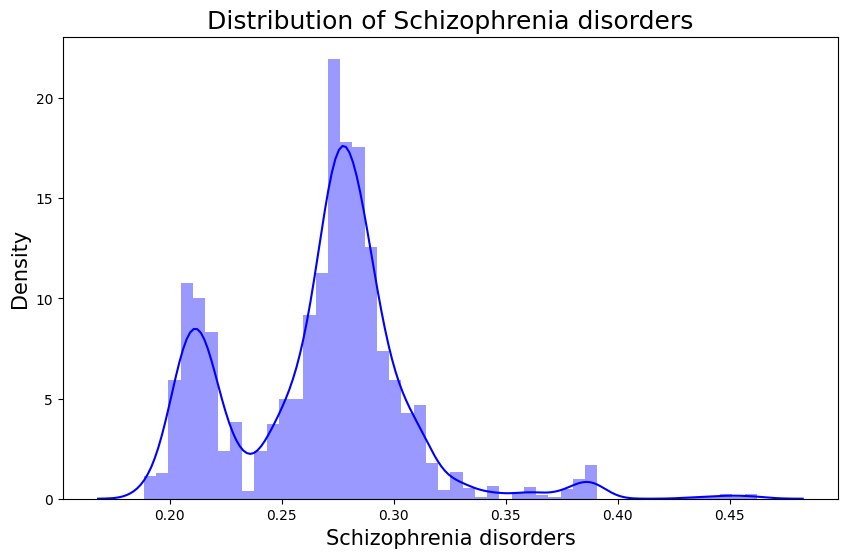

In [106]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], color='b')
plt.title('Distribution of Schizophrenia disorders', size=18)
plt.xlabel('Schizophrenia disorders', size=15)
plt.ylabel('Density', size=15)
plt.show()

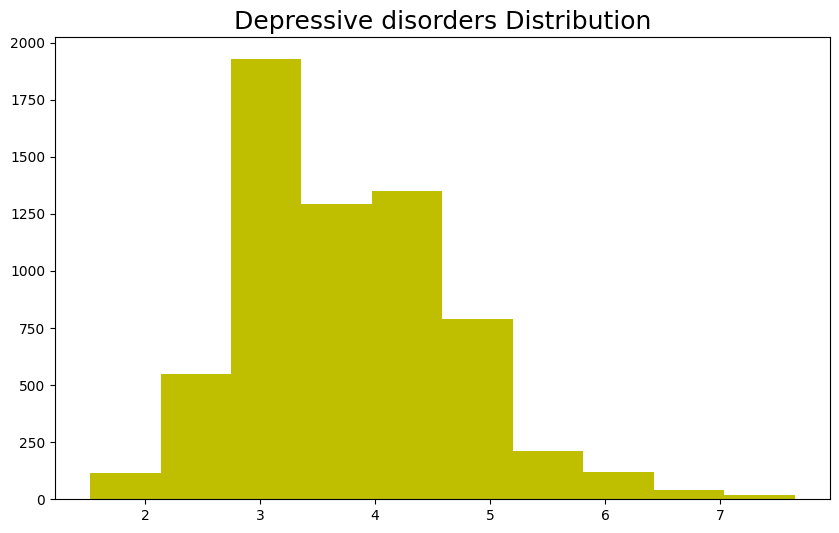

In [107]:
plt.figure(figsize=(10,6))
plt.hist(dataset['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'],color='y')
plt.title('Depressive disorders Distribution',size=18)
plt.show()

<ipython-input-108-1898675743>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


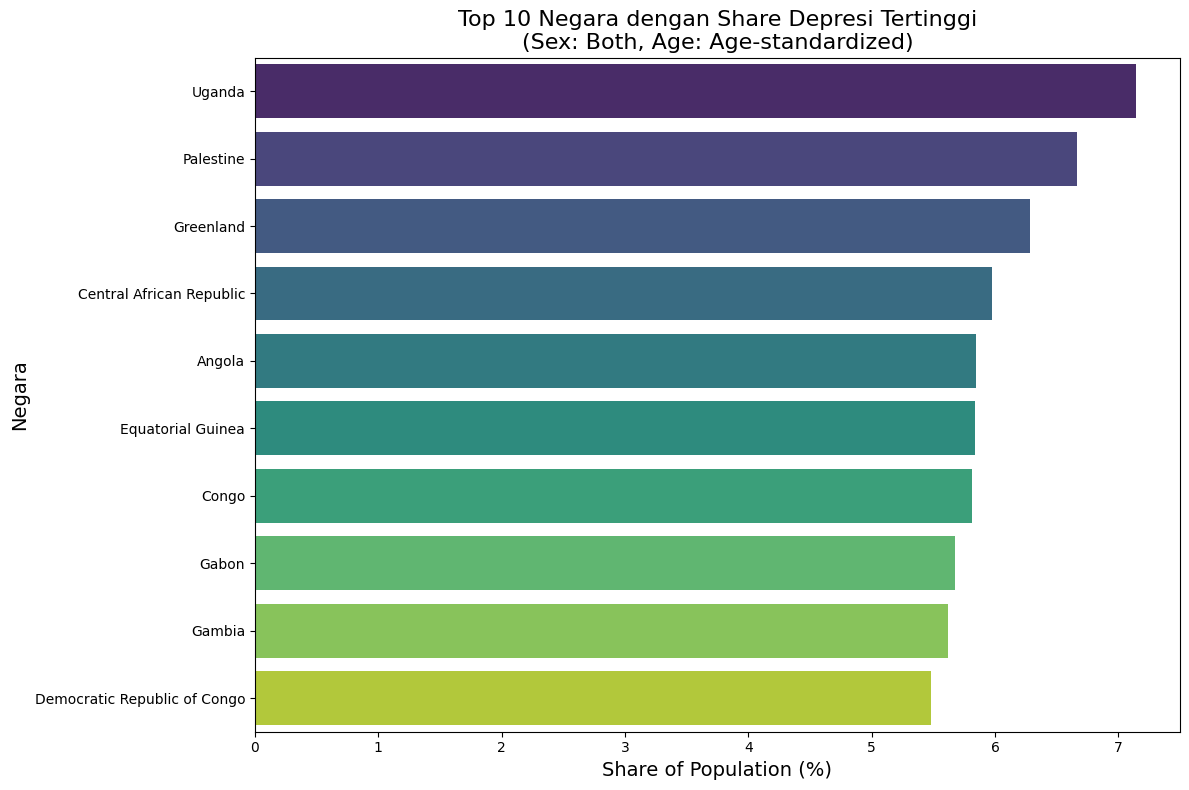

In [108]:
filtered_data = dataset
mean_depression = filtered_data.groupby('Entity')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
# Ambil 10 negara teratas
top_10 = mean_depression.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Negara dengan Share Depresi Tertinggi\n(Sex: Both, Age: Age-standardized)', size=16)
plt.xlabel('Share of Population (%)', size=14)
plt.ylabel('Negara', size=14)
plt.tight_layout()
plt.show()

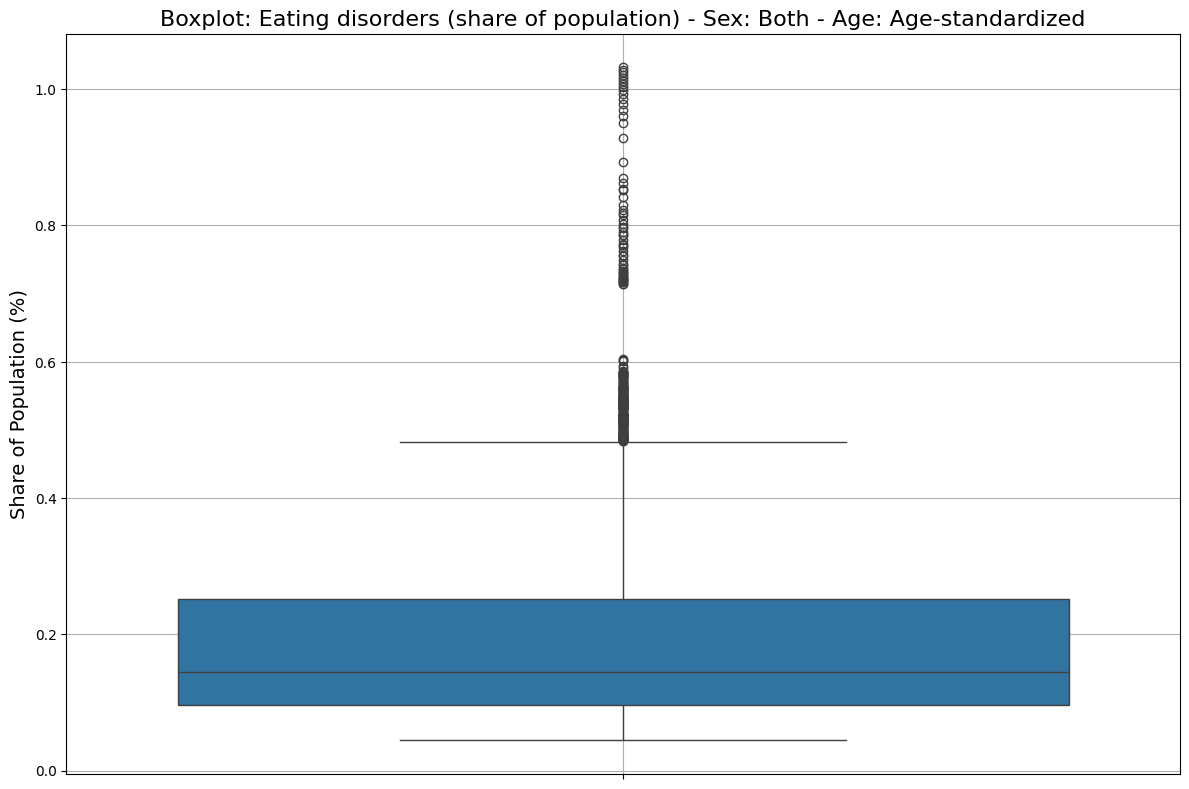

In [109]:
# Ambil semua kolom numerik
col = 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'

# Hitung IQR dan cari apakah ada outlier
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cek apakah ada outlier
outliers = dataset[(dataset[col] < lower) | (dataset[col] > upper)]

# Tampilkan boxplot jika ada outlier
if not outliers.empty:
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot: {col}', fontsize=16)
    plt.ylabel('Share of Population (%)', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada outlier di kolom tersebut.")

📖 Penjelasan:

Menggunakan metode IQR (Interquartile Range) untuk mendeteksi outlier.

Boxplot menampilkan apakah ada nilai ekstrim pada kolom tertentu, misalnya "Eating disorders".

**MULTIVARIABLE**

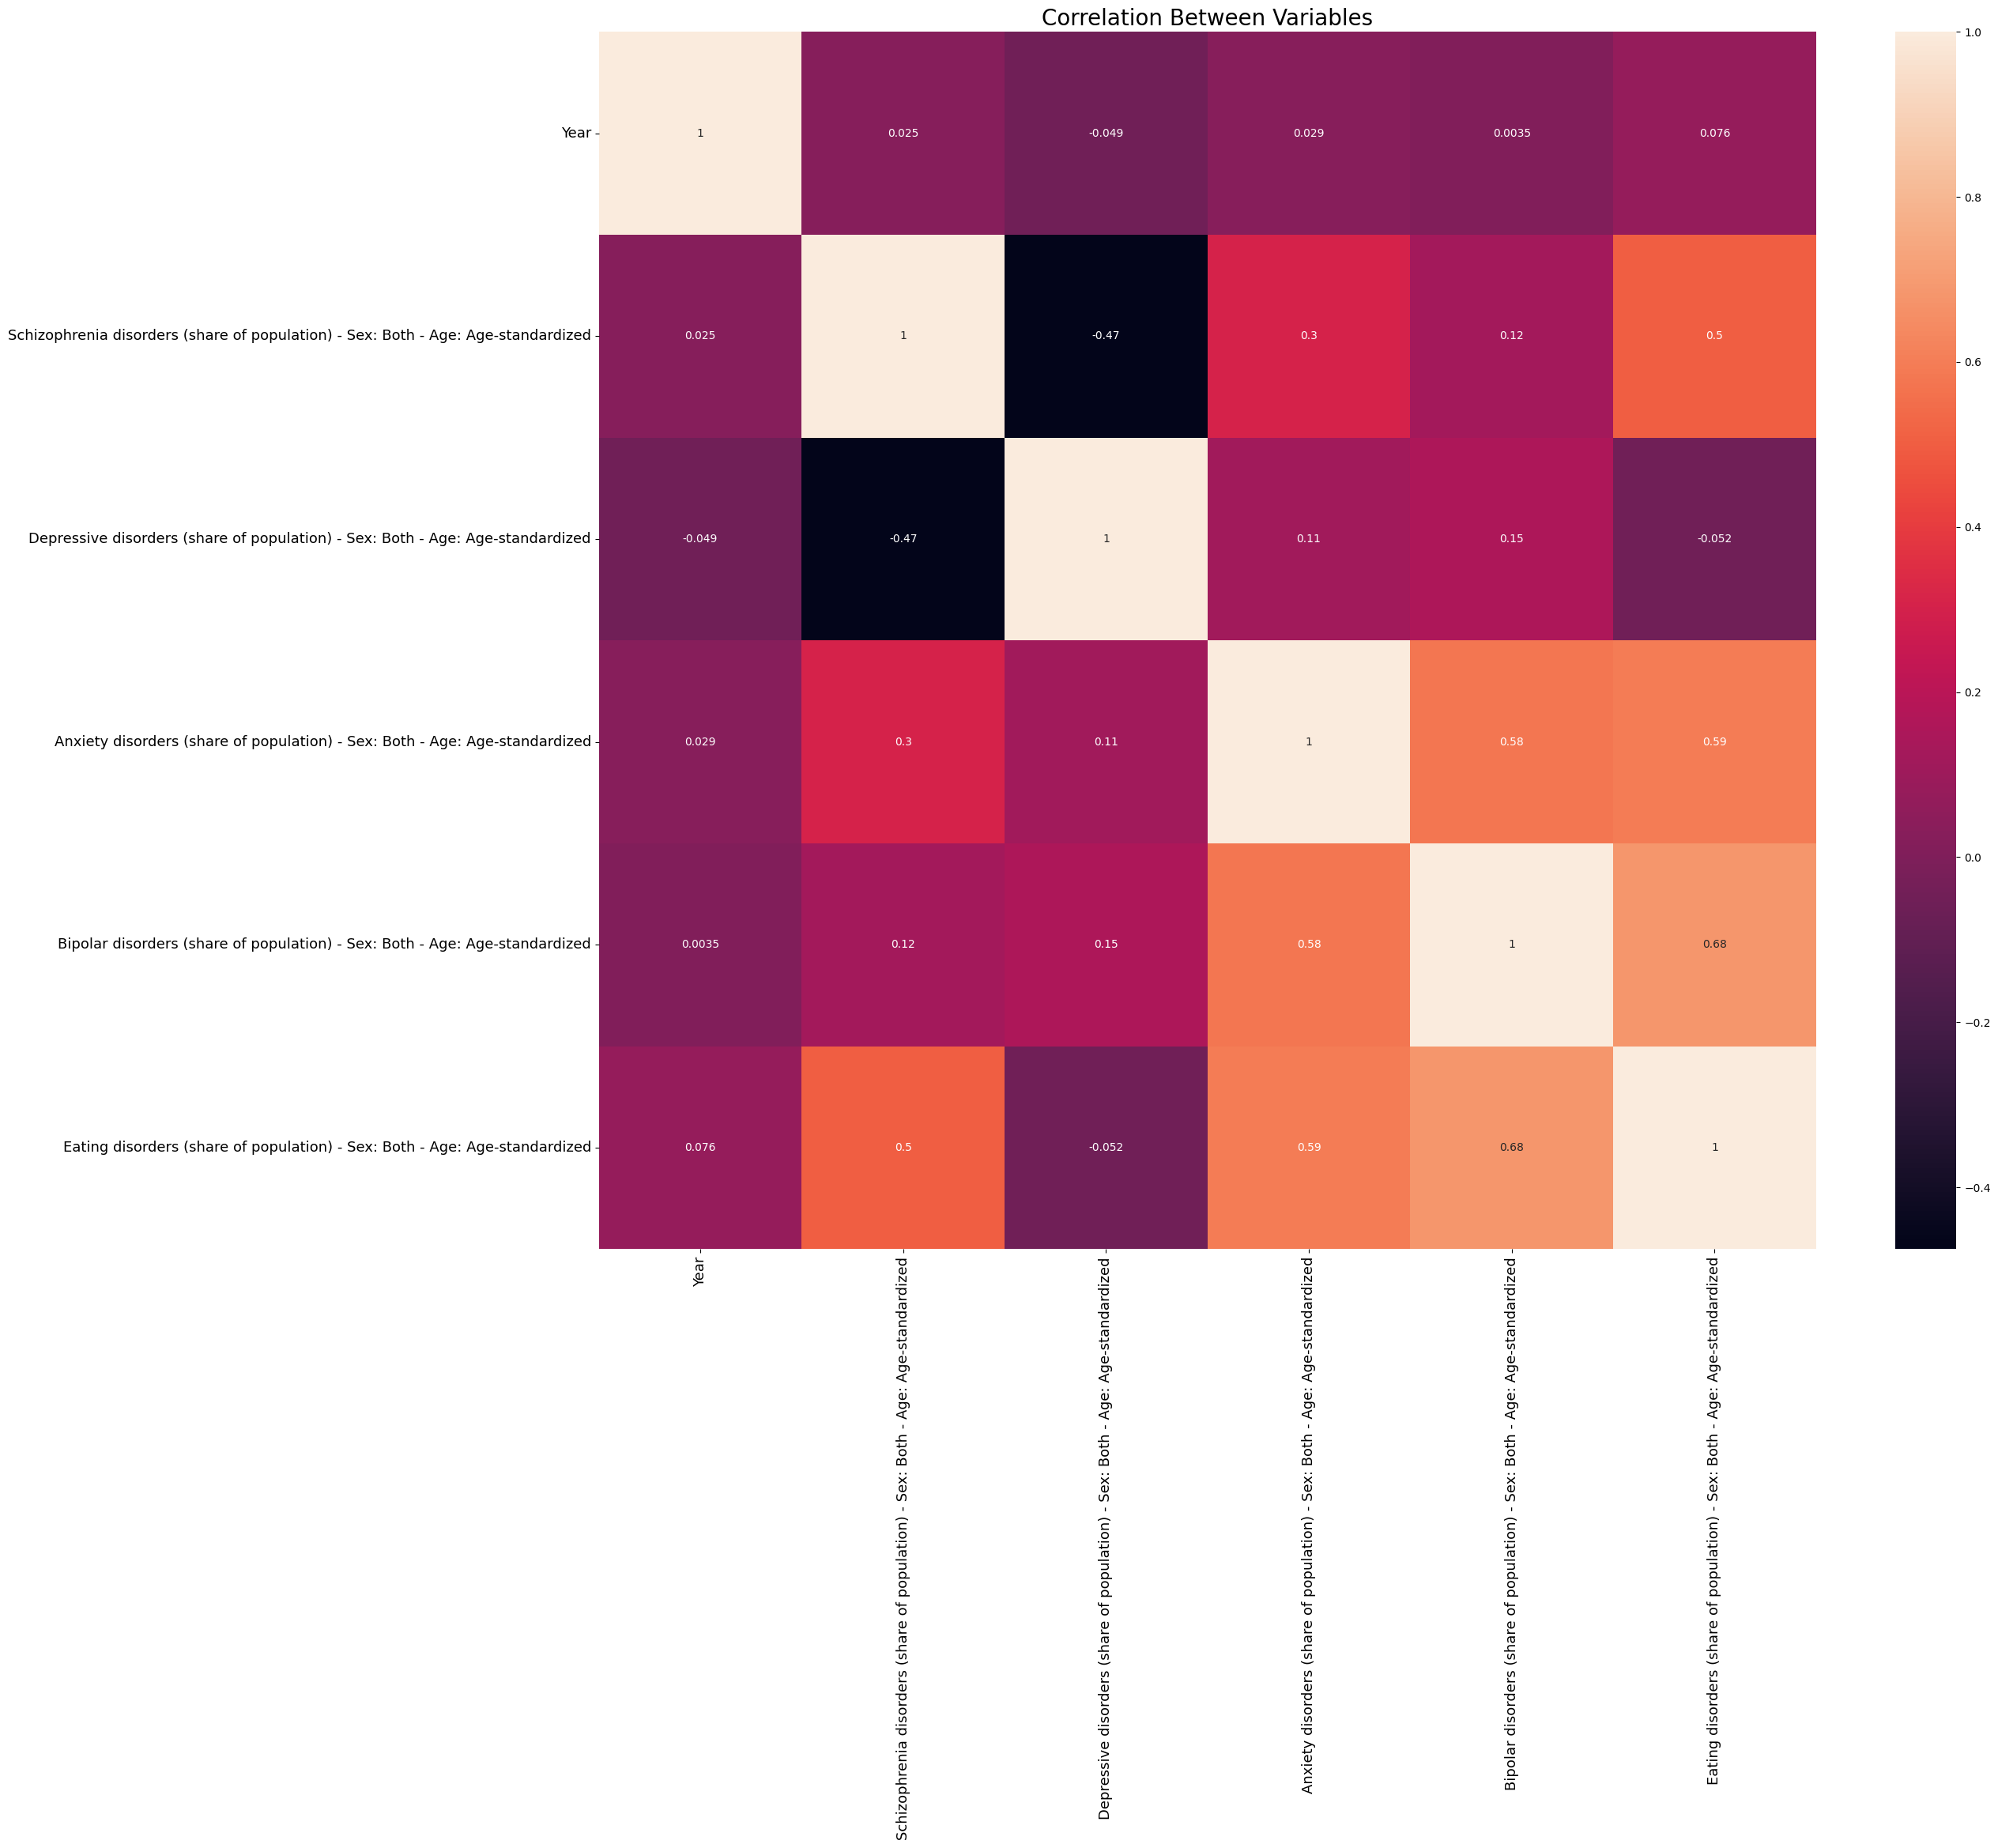

In [110]:
plt.figure(figsize=(26,20))
# Use the 'dataset' variable instead of 'df'
numerical_df = dataset.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, square=True)
plt.title('Correlation Between Variables', size=20)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

📖 Penjelasan:

Heatmap digunakan untuk melihat hubungan antar fitur numerik (korelasi).

Jika dua fitur sangat berkorelasi, kamu bisa memilih salah satu saja untuk clustering.

📌 Tujuan utama visualisasi ini:

Menentukan apakah fitur memiliki distribusi yang mendukung proses clustering.

Mendeteksi fitur dominan dan outlier.

Menentukan fitur yang berkaitan erat.





# **5. Fiture Engineering**

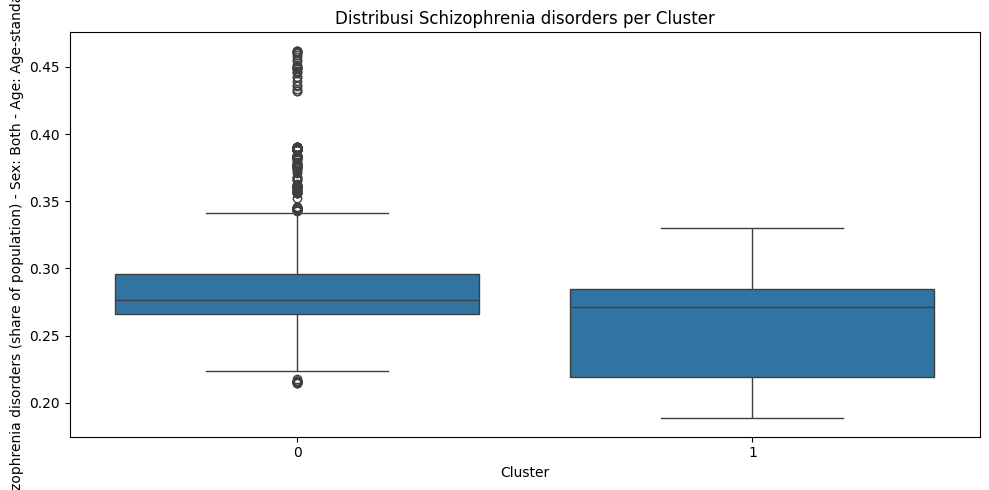

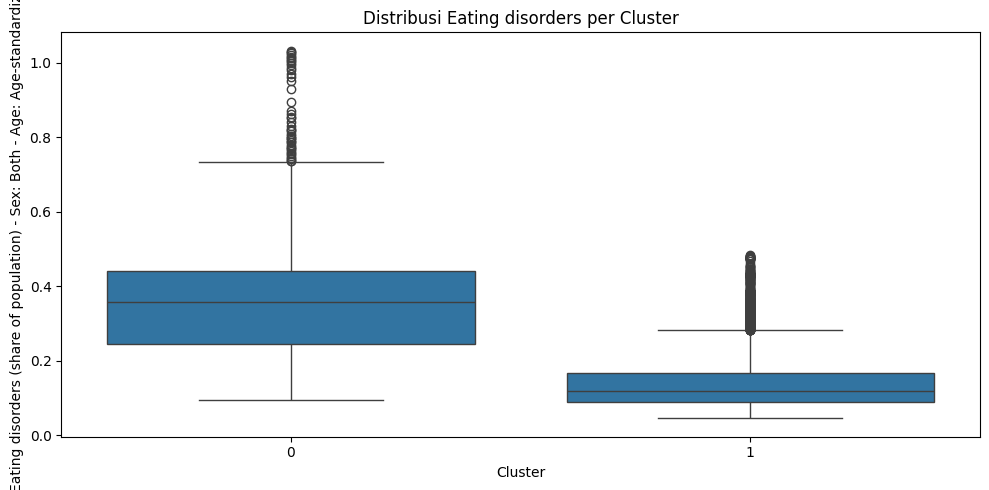

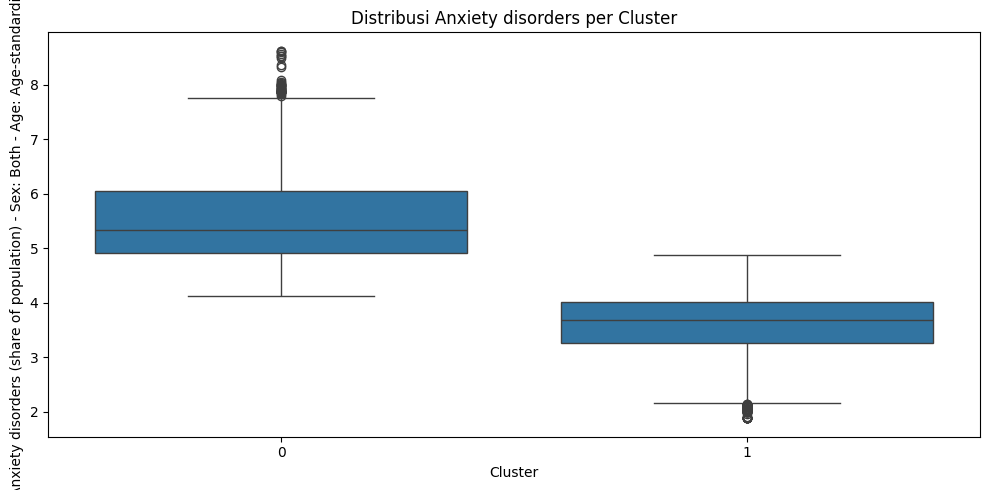

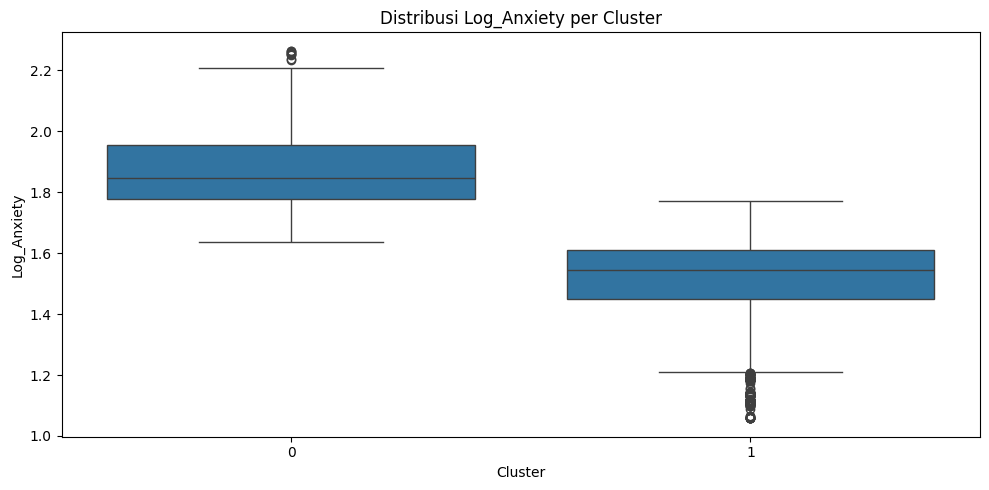

In [133]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ambil kolom numerik yang relevan
features = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
]

# Create the 'Log_Anxiety' column before using it
dataset['Log_Anxiety'] = np.log1p(dataset['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'])
features.append('Log_Anxiety')

# Buat dataset baru hanya dengan fitur yang dipilih
X = dataset[features].copy()

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Cluster', y=feature, data=dataset)
    plt.title(f"Distribusi {feature.split('(')[0].strip()} per Cluster")
    plt.tight_layout()
    plt.show()

📌 Penjelasan:

Dipilih 5 fitur utama dari dataset berdasarkan jenis gangguan mental yang prevalensinya diukur dalam persentase penduduk.

Semua fitur ini bersifat numerik dan kontinu, cocok untuk proses clustering.



In [114]:
# Total burden dari semua gangguan
dataset['Total_mental_disorder'] = dataset[features].sum(axis=1)

# Rasio depresif terhadap total gangguan
dataset['Depression_ratio'] = dataset['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] / dataset['Total_mental_disorder']


In [115]:
features.extend(['Total_mental_disorder', 'Depression_ratio'])

# Perbarui data dan standarisasi ulang
X = dataset[features].copy()
X_scaled = scaler.fit_transform(X)


📌 Penjelasan:

Menambahkan dua fitur baru ke daftar fitur utama.

Standarisasi ulang untuk menyamakan skala seluruh fitur baru + lama.

In [116]:
dataset['Log_Anxiety'] = np.log1p(dataset['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'])
features.append('Log_Anxiety')


In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(dataset[features])

📌 Penjelasan:

np.log1p digunakan untuk mengurangi efek outlier atau skewness pada data Anxiety.

Log transform sering digunakan jika distribusi sangat miring (right-skewed).

log1p(x) = log(1 + x), aman untuk nilai 0.

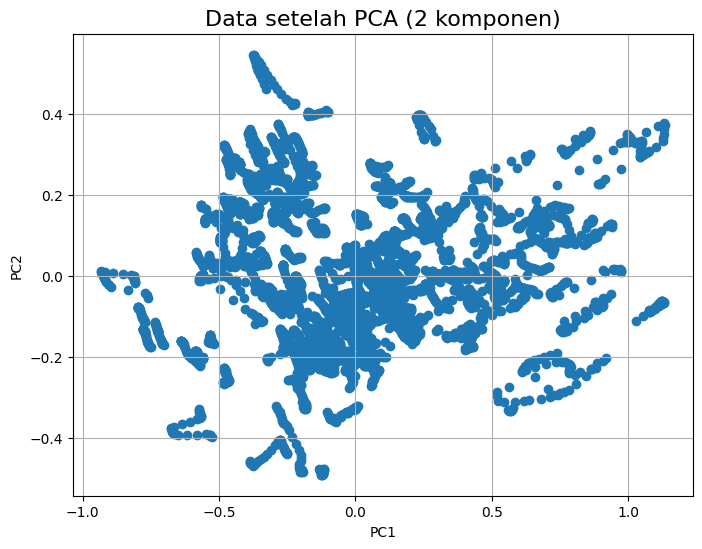

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi 2D sebelum clustering
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('Data setelah PCA (2 komponen)', size=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


📌 Penjelasan:

PCA (Principal Component Analysis) mengurangi dimensi data menjadi 2 komponen utama (PC1 & PC2).

Tujuan: Visualisasi sebelum clustering dan mengurangi kompleksitas data.

Proses feature engineering ini sangat penting untuk mempersiapkan data agar clustering bisa dilakukan secara akurat dan efektif. Fitur tambahan dan transformasi data digunakan untuk menambahkan konteks dan memperbaiki distribusi, sedangkan PCA digunakan untuk keperluan visualisasi.

# **6. Elbow Method untuk Menentukan K**

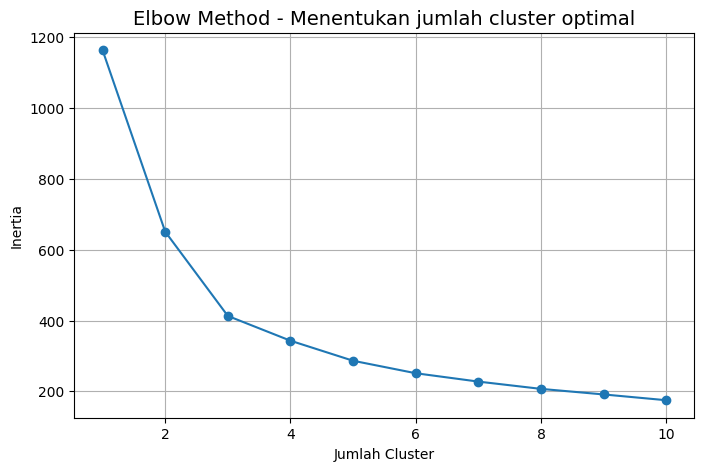

In [119]:
inertia = []
range_k = range(1, 11)
for k in range_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method - Menentukan jumlah cluster optimal', fontsize=14)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

📖 Penjelasan:

1. inertia_ adalah jumlah total jarak kuadrat (SSE) antara setiap titik dan pusat clusternya.
2. Semakin kecil inertia, semakin padat cluster-nya.
3. Kita menghitung inertia untuk beberapa nilai K (1–10), lalu dianalisis grafiknya.

**Mengapa Elbow Penting?**

Karena K-Means tidak tahu berapa jumlah cluster dari awal. Kita harus bantu algoritma memilih K yang:

Tidak terlalu sedikit (underfit)

Tidak terlalu banyak (overfit)

Efisien secara komputasi dan bermakna secara interpretasi



# **7. Clustering dengan KMeans**

In [120]:
k = 2  # kamu bisa ubah sesuai hasil Elbow
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil clustering ke dataset
dataset['Cluster'] = clusters

📖 Penjelasan:

n_clusters=k: Menentukan jumlah kelompok (cluster).

fit_predict: Mencari pusat cluster dan mengelompokkan semua data.

Hasil berupa array clusters yang berisi label cluster (0, 1, 2, 3)

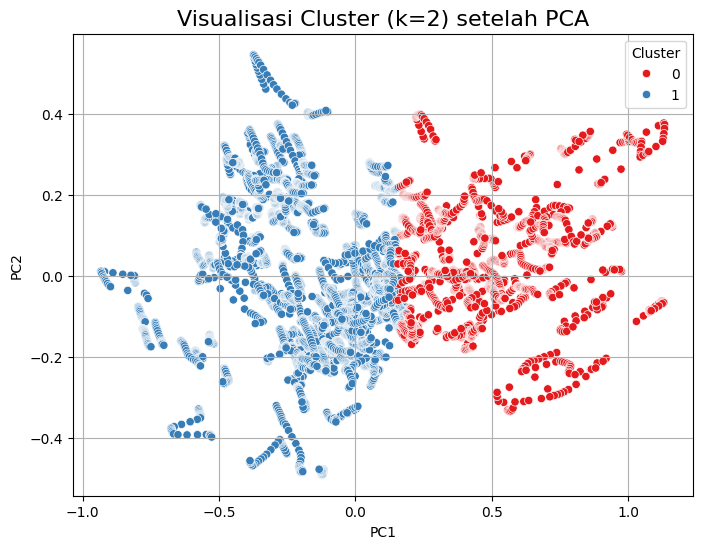

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set1')
plt.title(f'Visualisasi Cluster (k={k}) setelah PCA', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

📖 Penjelasan:

Data divisualisasikan dalam 2 dimensi menggunakan hasil PCA sebelumnya.

Setiap warna menunjukkan cluster yang berbeda.

Ini membantu kamu melihat:

1. Apakah cluster terpisah dengan baik

2. Apakah ada tumpang tindih antar cluster

In [122]:
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4216


Silhouette Score mengukur seberapa baik objek dalam suatu cluster cocok dengan cluster-nya sendiri dan tidak cocok dengan cluster lain.

Nilai berkisar antara:

🟥 -1: Salah cluster

🟨 0: Ambigu

🟩 1: Sangat tepat

Umumnya, nilai di atas 0.5 dianggap cukup baik, > 0.7 sangat bagus.


| Skor          | Interpretasi Umum                                       |
| ------------- | ------------------------------------------------------- |
| > 0.7         | Cluster sangat jelas (bagus) ✅                          |
| 0.5 – 0.7     | Cluster cukup baik 👍                                   |
| 0.3 – 0.5 | **Cluster masih terbentuk tapi agak tumpang tindih** ⚠️ |
| < 0.3         | Struktur cluster lemah atau salah 💀                    |
| < 0           | Penempatan data ke cluster salah ❌                      |


**Penjelasan:**

Melatih model K-Means untuk membagi data menjadi 4 cluster. Hasil cluster ditambahkan ke dataset agar bisa dianalisis lebih lanjut.

# **8. Analisis Setiap Cluster**

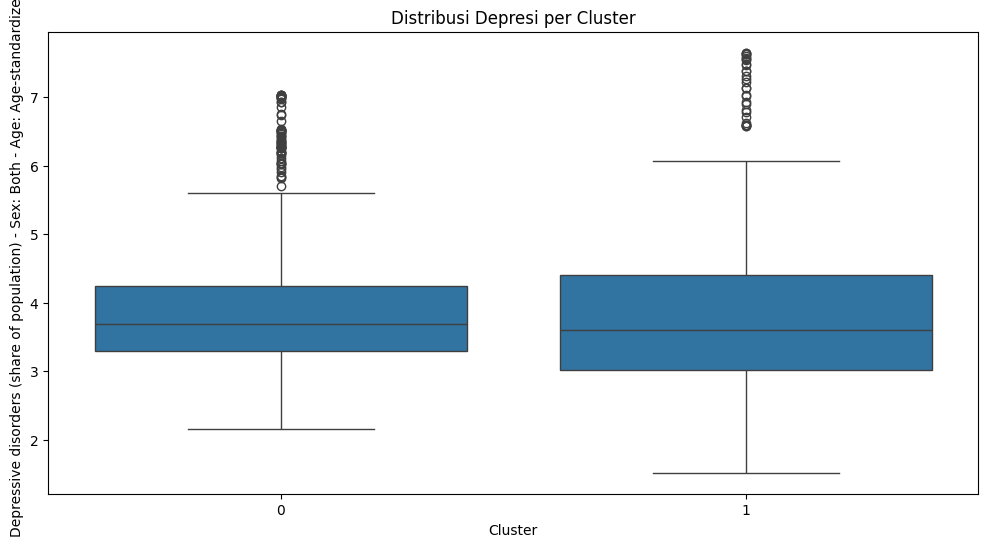

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', data=dataset)
plt.title("Distribusi Depresi per Cluster")
plt.show()

# **Interpretasi Boxplot**
🔍 1. Cluster 0:
Median depresi sekitar 3.7%
Rentang interkuartil (IQR) lebih sempit
Terdapat banyak outlier di atas 5.5% hingga 7%

Artinya: mayoritas negara di klaster ini punya tingkat depresi cukup stabil, tapi ada beberapa negara dengan tingkat depresi sangat tinggi → mungkin negara dengan kasus ekstrim


🔍 2. Cluster 1:
Median depresi sekitar 3.5%, sedikit lebih rendah dari cluster 0
Variasi lebih besar dibanding klaster 0
Banyak outlier juga di atas 6.0%

Artinya: klaster ini lebih beragam, mencakup negara dengan tingkat depresi sangat rendah hingga tinggi


*Berdasarkan boxplot distribusi gangguan depresi pada masing-masing klaster, terlihat bahwa baik klaster 0 maupun 1 memiliki median tingkat depresi yang cukup sebanding, yaitu sekitar 3.5%–3.7%. Namun, klaster 1 menunjukkan rentang distribusi yang lebih luas, mengindikasikan bahwa klaster ini mencakup negara-negara dengan variasi gangguan depresi yang lebih besar. Selain itu, banyaknya outlier pada kedua klaster menunjukkan bahwa terdapat negara-negara dengan tingkat gangguan depresi yang sangat tinggi, meskipun secara umum proporsinya relatif moderat.*

# **9. Simpan dan Inference Model**

In [129]:
import joblib

# Simpan model dan scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Contoh penggunaan kembali model
new_data = [[0.2, 0.1, 0.05, 0.3, 0.4, 1.05, 0.38]]
loaded_scaler = joblib.load('scaler.pkl')
loaded_model = joblib.load('kmeans_model.pkl')

new_data_scaled = loaded_scaler.transform(new_data)
cluster_new = loaded_model.predict(new_data_scaled)
print(f"Cluster data baru: {cluster_new[0]}")


Cluster data baru: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Proses penyimpanan model menggunakan joblib memungkinkan model KMeans dan scaler digunakan kembali untuk mengelompokkan data baru tanpa perlu melatih ulang model dari awal. Hal ini sangat berguna dalam implementasi nyata, terutama dalam sistem yang membutuhkan klasifikasi data mental health secara otomatis dan berkelanjutan.

In [130]:
cluster_summary = dataset.groupby('Cluster')[features].mean().round(4)
print(cluster_summary)

         Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
Cluster                                                                                      
0                                                   0.2896                                   
1                                                   0.2590                                   

         Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
Cluster                                                                               
0                                                   0.3604                            
1                                                   0.1409                            

         Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
Cluster                                                                                
0                                                   5.5085                             
1         

Tujuan Analisis Ini
Langkah ini digunakan untuk menjawab pertanyaan:

"Apa ciri khas masing-masing klaster?"

Misalnya:

Cluster 0 → memiliki rata-rata tingkat depresi tertinggi

Cluster 1 → memiliki kombinasi rata-rata bipolar dan eating disorder yang dominan

Cluster 2 → total burden mental disorder paling rendah

dst.

----------------------------------------------------------
**Interpretasi Klaster**

🔴 Cluster 0 – Gangguan Mental Berat & Beragam
Skor tertinggi untuk:
1. Anxiety disorders
2. Eating disorders
3. Schizophrenia
4. Total gangguan mental
Rata-rata depresi tinggi (tapi rasio terhadap total lebih rendah: 48,5%)
Karakter:
Klaster ini mencerminkan kelompok negara yang memiliki beban gangguan mental tinggi secara umum, terutama anxiety dan eating disorder.


🔵 Cluster 1 – Dominasi Depresi
Nilai gangguan lain (anxiety, schizophrenia) lebih rendah dari Cluster 0
Depression_ratio tinggi: 68,4% dari total gangguan mental adalah depresi

Karakter:

Klaster ini mewakili kelompok dengan beban gangguan mental yang lebih ringan secara total, namun dengan proporsi depresi yang sangat dominan.

*Berdasarkan hasil clustering, terbentuk dua klaster utama dengan karakteristik yang berbeda. Klaster 0 menunjukkan profil negara-negara dengan tingkat gangguan mental yang lebih tinggi secara keseluruhan, khususnya gangguan kecemasan dan makan. Sebaliknya, Klaster 1 terdiri dari negara-negara dengan tingkat gangguan mental lebih rendah secara total, namun didominasi oleh gangguan depresi. Hal ini menunjukkan bahwa pendekatan clustering mampu mengungkap struktur laten pada data kesehatan mental global.*

# **10. Evaluasi Clustering**

In [131]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_scaled, clusters))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, clusters))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters))


Silhouette Score: 0.42155380535860715
Calinski-Harabasz Index: 5054.917468121108
Davies-Bouldin Index: 0.918827361133732


1. Silhouette Score: 0.4216
📌 Makna:
Skor ini mengukur seberapa baik setiap data cocok dengan klusternya sendiri dibandingkan dengan kluster lain.
Rentang nilai: -1 (buruk) sampai +1 (baik).

2. Calinski-Harabasz Index: 5054.92
📌 Makna:
Mengukur rasio antara variansi antar klaster dengan variansi dalam klaster.
Semakin tinggi nilainya, semakin baik pemisahan klasternya.

3. Davies-Bouldin Index: 0.9188
📌 Makna:
Mengukur seberapa mirip satu klaster dengan klaster lain.
Semakin kecil nilainya, semakin bagus klasternya (karena artinya klaster tidak mirip satu sama lain).

| Metrik            | Nilai    | Kualitas      |
| ----------------- | -------- | ------------- |
| Silhouette Score  | `0.42`   | ✅ Cukup Baik  |
| Calinski-Harabasz | `5054.9` | ✅ Sangat Baik |
| Davies-Bouldin    | `0.9188` | ✅ Baik        |


## 🧾 Kesimpulan

Melalui proyek ini, saya berhasil menerapkan algoritma **K-Means Clustering** untuk melakukan segmentasi negara berdasarkan prevalensi gangguan mental. Hasil analisis menunjukkan bahwa:

- Data dapat dikelompokkan menjadi dua klaster utama yang memiliki karakteristik berbeda.
- **Cluster 0** didominasi oleh negara-negara dengan tingkat gangguan mental yang tinggi secara menyeluruh, terutama pada gangguan kecemasan dan eating disorder.
- **Cluster 1** memiliki total gangguan mental yang lebih rendah, namun proporsi gangguan depresinya sangat tinggi.
- Evaluasi model menggunakan metrik **Silhouette Score (0.4216)**, **Calinski-Harabasz Index (5054.92)**, dan **Davies-Bouldin Index (0.9188)** menunjukkan bahwa kualitas klaster yang terbentuk cukup baik dan stabil.
- Model K-Means ini juga dapat digunakan kembali untuk mengklasifikasikan data baru setelah dilakukan standarisasi.

Kesimpulannya, metode clustering terbukti efektif dalam mengungkap struktur tersembunyi dari data gangguan mental global, yang dapat menjadi dasar awal dalam penyusunan kebijakan atau strategi intervensi kesehatan mental antar negara.
